In [ ]:

path_text = r'E:\Projects\Omdena\__HOTOSM\Code\ramp_data_labels_only\ramp_data_labels_only'

In [1]:
import os
import geopandas as gpd

from tqdm import tqdm

import matplotlib.pyplot as plt

from shapely.geometry import Polygon
from shapely.plotting import plot_polygon, plot_points

In [2]:

def list_geojson_files(folder_path):

    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith('.geojson'):
                file_path = os.path.join(root, file)
                geojson_files.append(file_path)
    return geojson_files



In [3]:
def open_geojson(file_path):
    gdf = gpd.read_file(file_path)
    return gdf

In [4]:
# Example usage
geojson_files = []

folder_path = path_text
geojson_files = list_geojson_files(folder_path)

NameError: name 'path_text' is not defined

In [ ]:
len(geojson_files)

111234

In [ ]:
geojson_files[0]

'E:\\Projects\\Omdena\\__HOTOSM\\Code\\ramp_data_labels_only\\ramp_data_labels_only\\ramp_accra_ghana\\labels\\000c57e6-74f7-4d78-ae65-5b7a6c50ce68.geojson'

In [ ]:
gdf = open_geojson(geojson_files[0])

In [ ]:
item_counts = {}
total_holes = 0

for index, item in enumerate(tqdm(geojson_files)):
    # Do something with each item
    gdf = open_geojson(item)
    length = len(gdf)
    if length not in item_counts:
        item_counts[length] = 0
    item_counts[length] += 1

    if length != 0:
        for polygon in gdf.geometry:
            if polygon.geom_type == 'MultiPolygon':
                # do multipolygon things.
                for poly in polygon.geoms:
                    num_holes = len(poly.interiors)
                    total_holes += num_holes
            elif polygon.geom_type == 'Polygon':
                # do polygon things.
                num_holes = len(polygon.interiors)
                total_holes += num_holes
            else:
                # raise IOError('Shape is not a polygon.')
                print("Shape is not a polygon")
            ###

    # for testing:
    # if index >= 999:  # Break after 100 iterations (0-indexed)
    #     break

  5%|███▎                                                                      | 5059/111234 [04:55<1:43:23, 17.12it/s]


KeyboardInterrupt: 

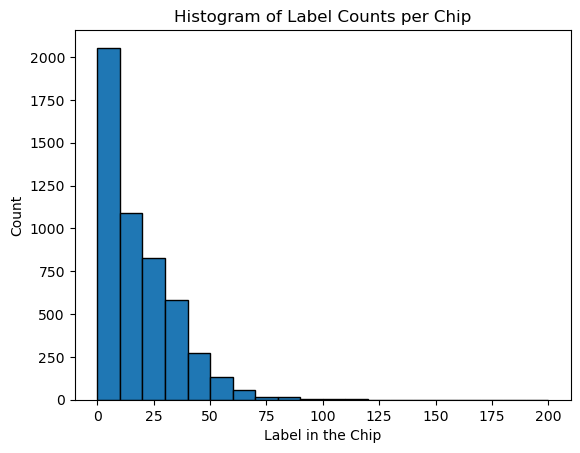

In [ ]:
sorted_item_counts = dict(sorted(item_counts.items()))

# for length, count in sorted_item_counts.items():
#     print(f"{length}: {count}")

# Filter out zero counts
non_zero_counts = {k: v for k, v in sorted_item_counts.items() if v != 0}

# Prepare data for histogram
lengths = list(non_zero_counts.keys())
counts = list(non_zero_counts.values())

# Plot histogram
plt.hist(lengths, bins=range(0, max(lengths) + 11, 10), weights=counts, edgecolor='black')
plt.xlabel("Label in the Chip")
plt.ylabel("Count")
plt.title("Histogram of Label Counts per Chip")
plt.show()

In [ ]:
zero_count = item_counts.get(0, 0)
print(f"Number of items with no Labels: {zero_count}")

Number of items with no Labels: 506


In [ ]:
total_holes

0